# 2. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import seaborn as sns
import os
%matplotlib inline

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2     

#image reader
import imageio.v2 as imageio
from PIL import Image

#module for copy/remove file
import shutil

#### Sample image

To illustrate the various stages of the data cleaning process, we employed a sample image as a reference point for the pre-and post-processing stages.

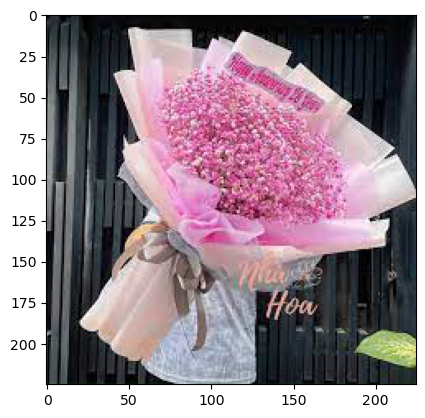

In [2]:
sample_path="Flowers/Flowers/Babi/babi_1.jpg"
source_folder = "Flowers/Flowers"
destination_folder = r"Flowers_Cleaned/Flowers"

#read image
img = mpimg.imread(sample_path)

#show image
plt.imshow(img)

In [4]:
# Function to show the image before and after process
def show_before_after(img,img_after,title_after):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Original")

    plt.subplot(1,3,2)
    plt.imshow(img_after)
    plt.title(title_after)

#### Normalization
This process changes the range of pixel intensity values. The purpose of performing normalization is to bring image to range that is normal to sense.

In [6]:
def normalization(img):
    norm_img = np.zeros((img.shape[0], img.shape[1]))
    return cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)

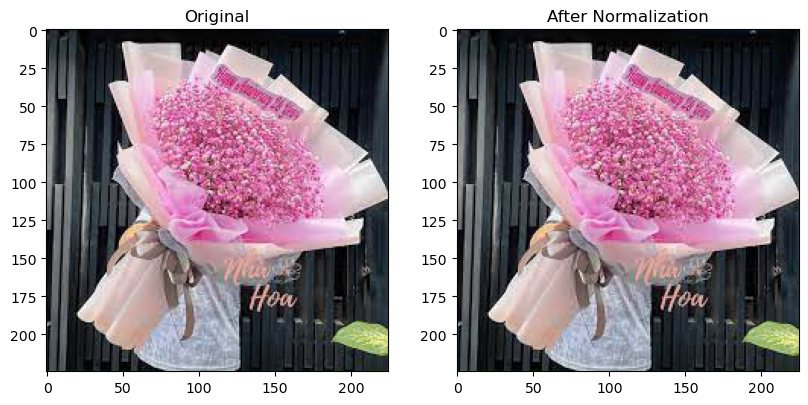

In [7]:
show_before_after(img,normalization(img),"After Normalization")

#### Detect corrupt image

It is crucial to detect corrupted images, as they can negatively impact the performance of a machine learning model or computer vision system. Images that have been corrupted may contain noise, artifacts, or other anomalies that can lead to misclassifications or output errors. Improve the accuracy and dependability of a model or system by detecting and removing these images from the dataset. In addition, corrupted images can cause biases in the model or system, which can lead to erroneous results or unjust decisions.

In [8]:
#Function to create a folder including cleaned data
def clone_folder():
    shutil.copytree(source_folder, destination_folder)
    print('Copied')

In [9]:
clone_folder()

Copied


In [10]:
from pathlib import Path

corrupted_image = list()
accu = 0

for root, dirs, files in os.walk(destination_folder):
    for name in dirs:
        print(os.path.join(root, name))
        for image_file in Path(os.path.join(root, name)).glob('*.jpg'):
          accu = accu + 1
          try :
                #read image
                img = imageio.imread(image_file)
                #normalization
                img = normalization(img)
                #Saving images:
                imageio.imsave(image_file, img)
          except :
              print(f'Cannot read image {image_file}')
              corrupted_image.append(image_file)
print("Total number of images : ", accu)

Flowers_Cleaned/Flowers\Babi
Flowers_Cleaned/Flowers\Calimerio
Flowers_Cleaned/Flowers\Chrysanthemum
Flowers_Cleaned/Flowers\Hydrangeas
Flowers_Cleaned/Flowers\Lisianthus
Flowers_Cleaned/Flowers\Pingpong
Flowers_Cleaned/Flowers\Rosy
Flowers_Cleaned/Flowers\Tana
Total number of images :  4621


In [11]:
len(corrupted_image)

0

#### Image duplication detection

Duplicate image detection is essential for multiple reasons:

* <b>Reducing storage</b>: Storing duplicate images wastes storage space, and detecting and removing them can help reduce storage costs.

* <b>Improving efficiency</b>: Processing or analyzing duplicate images is inefficient and time-consuming. Removing duplicates can improve processing and analysis efficiency.

* <b>Enhancing accuracy</b>: Duplicate images can bias the results of image-based analysis, such as object detection or image classification. Removing duplicates can improve the accuracy of these analyses.

* <b>Maintaining data integrity</b>: Duplicates can lead to confusion and inconsistency in data, especially when dealing with large image datasets. Removing duplicates helps to maintain data integrity and consistency.

In [12]:
# Define a function to show original and its duplication
def show_dupes(img_name1, img_name2):
    fig = plt.figure()
    
    ax = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(Image.open(img_name1))
    title_name1=os.path.basename(img_name1).split('/')[-1]
    ax.set_title(title_name1)
    
    ax = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(Image.open(img_name2))
    title_name2=os.path.basename(img_name2).split('/')[-1]
    ax.set_title(title_name2)

In [13]:
import imagehash
import glob

hashes = {}
duplicated = []   

# Define a function to compute the hash of an image file
def compute_hash(filepath):
    with Image.open(filepath) as img:
        return str(imagehash.phash(img))
    
# Define a function to find and remove duplicated images
def check_duplicates(rootdir):
    rootdir = glob.glob(rootdir)
    duplicated = []
    max_length = 0
    for folder in rootdir:
        print()
        print(folder)
        for image_dir in glob.glob(folder+'/*.jpg'):
            # Compute the hash of the image file
            file_hash = compute_hash(image_dir)
            # Check if this hash has already been seen
            file=os.path.basename(image_dir).split('/')[-1]
            if file_hash in hashes:
                # if the image hash exists already, save the collision filenames
                dupe_idx = hashes[file_hash]
                duplicated.append((dupe_idx, image_dir))
            else:
                # This file is not a duplicate, so remember its hash
                hashes[file_hash] = image_dir
        print(r'Duplicated image in ',folder,' :',len(duplicated)-max_length)
        max_length=len(duplicated)
    if len(duplicated)>0:
        print(r'---- Examples of duplication ----')
        show_dupes(duplicated[0][0], duplicated[0][1])
        show_dupes(duplicated[1][0], duplicated[1][1])
        show_dupes(duplicated[2][0], duplicated[2][1])

# Define a function to find and remove duplicated images
def remove_duplicates(rootdir):
    rootdir = glob.glob(rootdir)
    print(hashes)
    for folder in rootdir:
        print()
        print(folder)
        for image_dir in glob.glob(folder+'/*.jpg'):
            # Compute the hash of the image file
            file_hash = compute_hash(image_dir)
            # Check if this hash has already been seen
            file=os.path.basename(image_dir).split('/')[-1]
            if image_dir not in hashes.values():
                print(file_hash)
                print(image_dir)
                os.remove(image_dir)
                print(f'Removed duplicate file: {file}')


Flowers_Cleaned/Flowers\Babi
Duplicated image in  Flowers_Cleaned/Flowers\Babi  : 41

Flowers_Cleaned/Flowers\Calimerio
Duplicated image in  Flowers_Cleaned/Flowers\Calimerio  : 41

Flowers_Cleaned/Flowers\Chrysanthemum
Duplicated image in  Flowers_Cleaned/Flowers\Chrysanthemum  : 26

Flowers_Cleaned/Flowers\Hydrangeas
Duplicated image in  Flowers_Cleaned/Flowers\Hydrangeas  : 15

Flowers_Cleaned/Flowers\Lisianthus
Duplicated image in  Flowers_Cleaned/Flowers\Lisianthus  : 131

Flowers_Cleaned/Flowers\Pingpong
Duplicated image in  Flowers_Cleaned/Flowers\Pingpong  : 17

Flowers_Cleaned/Flowers\Rosy
Duplicated image in  Flowers_Cleaned/Flowers\Rosy  : 21

Flowers_Cleaned/Flowers\Tana
Duplicated image in  Flowers_Cleaned/Flowers\Tana  : 135
---- Examples of duplication ----


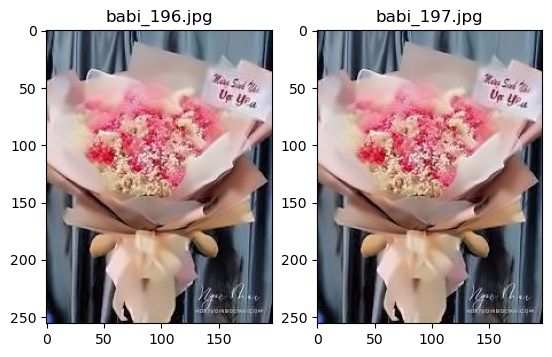

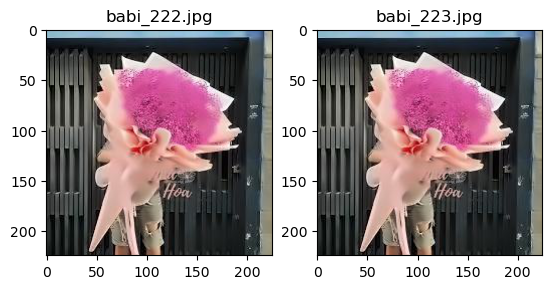

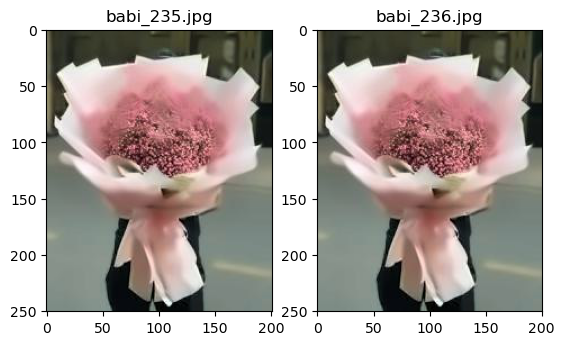

In [14]:
# Usage: specify the root directory to search for duplicates
check_duplicates('Flowers_Cleaned/Flowers/*')

In [15]:
remove_duplicates('Flowers_Cleaned/Flowers/*')

{}

Flowers_Cleaned/Flowers\Babi
c7174a592f613734
Flowers_Cleaned/Flowers\Babi\babi_1.jpg
Removed duplicate file: babi_1.jpg
c89f2c643c6a97b1
Flowers_Cleaned/Flowers\Babi\babi_10.jpg
Removed duplicate file: babi_10.jpg
d0ef5b06297c1927
Flowers_Cleaned/Flowers\Babi\babi_100.jpg
Removed duplicate file: babi_100.jpg
b9acd27987d3a031
Flowers_Cleaned/Flowers\Babi\babi_101.jpg
Removed duplicate file: babi_101.jpg
80bb625f312d3f91
Flowers_Cleaned/Flowers\Babi\babi_102.jpg
Removed duplicate file: babi_102.jpg
a7ddd024cacb8734
Flowers_Cleaned/Flowers\Babi\babi_103.jpg
Removed duplicate file: babi_103.jpg
81285a1579fe36f1
Flowers_Cleaned/Flowers\Babi\babi_104.jpg
Removed duplicate file: babi_104.jpg
9677385e2b41af60
Flowers_Cleaned/Flowers\Babi\babi_105.jpg
Removed duplicate file: babi_105.jpg
b234162dbdd6c652
Flowers_Cleaned/Flowers\Babi\babi_106.jpg
Removed duplicate file: babi_106.jpg
88b22f0f733d8e70
Flowers_Cleaned/Flowers\Babi\babi_107.jpg
Removed duplicate file: babi_107.jpg
b0ca6f2d48766

b607c737d938c8c8
Flowers_Cleaned/Flowers\Babi\babi_241.jpg
Removed duplicate file: babi_241.jpg
b9c6d0985f99e461
Flowers_Cleaned/Flowers\Babi\babi_242.jpg
Removed duplicate file: babi_242.jpg
caa03d2f43723c75
Flowers_Cleaned/Flowers\Babi\babi_243.jpg
Removed duplicate file: babi_243.jpg
caa03d2f43723c75
Flowers_Cleaned/Flowers\Babi\babi_244.jpg
Removed duplicate file: babi_244.jpg
85b14a5f0f6b2978
Flowers_Cleaned/Flowers\Babi\babi_245.jpg
Removed duplicate file: babi_245.jpg
d76446cec0e22d97
Flowers_Cleaned/Flowers\Babi\babi_246.jpg
Removed duplicate file: babi_246.jpg
d0877c417ee4273a
Flowers_Cleaned/Flowers\Babi\babi_247.jpg
Removed duplicate file: babi_247.jpg
90ad12075f7e2e78
Flowers_Cleaned/Flowers\Babi\babi_248.jpg
Removed duplicate file: babi_248.jpg
c7986f3eb1e51092
Flowers_Cleaned/Flowers\Babi\babi_249.jpg
Removed duplicate file: babi_249.jpg
d083895ebfb5b482
Flowers_Cleaned/Flowers\Babi\babi_25.jpg
Removed duplicate file: babi_25.jpg
fc1aa79987c2d2a1
Flowers_Cleaned/Flowers\B

e1154f4e2d2e3734
Flowers_Cleaned/Flowers\Babi\babi_384.jpg
Removed duplicate file: babi_384.jpg
d1d10ea32f796c94
Flowers_Cleaned/Flowers\Babi\babi_385.jpg
Removed duplicate file: babi_385.jpg
96f1565228af2fc1
Flowers_Cleaned/Flowers\Babi\babi_386.jpg
Removed duplicate file: babi_386.jpg
f449cb314f2f61b0
Flowers_Cleaned/Flowers\Babi\babi_387.jpg
Removed duplicate file: babi_387.jpg
e598d3249c63d23d
Flowers_Cleaned/Flowers\Babi\babi_388.jpg
Removed duplicate file: babi_388.jpg
87b2fdc9d0267849
Flowers_Cleaned/Flowers\Babi\babi_389.jpg
Removed duplicate file: babi_389.jpg
bf8731bc9966301c
Flowers_Cleaned/Flowers\Babi\babi_39.jpg
Removed duplicate file: babi_39.jpg
d1d10ea32f796c94
Flowers_Cleaned/Flowers\Babi\babi_390.jpg
Removed duplicate file: babi_390.jpg
d6c26ef7026ae5c0
Flowers_Cleaned/Flowers\Babi\babi_391.jpg
Removed duplicate file: babi_391.jpg
d4834b5639de7069
Flowers_Cleaned/Flowers\Babi\babi_392.jpg
Removed duplicate file: babi_392.jpg
a4dbcdf94012f08f
Flowers_Cleaned/Flowers\B

e45986236d7e72e0
Flowers_Cleaned/Flowers\Babi\babi_53.jpg
Removed duplicate file: babi_53.jpg
d0302bb5f50ab5ce
Flowers_Cleaned/Flowers\Babi\babi_530.jpg
Removed duplicate file: babi_530.jpg
ac939523dc1379c3
Flowers_Cleaned/Flowers\Babi\babi_531.jpg
Removed duplicate file: babi_531.jpg
bde3c8c20daf70a4
Flowers_Cleaned/Flowers\Babi\babi_532.jpg
Removed duplicate file: babi_532.jpg
b2dce26a6989e626
Flowers_Cleaned/Flowers\Babi\babi_533.jpg
Removed duplicate file: babi_533.jpg
bde5e1eb2e05026c
Flowers_Cleaned/Flowers\Babi\babi_534.jpg
Removed duplicate file: babi_534.jpg
a38df558a4449bad
Flowers_Cleaned/Flowers\Babi\babi_535.jpg
Removed duplicate file: babi_535.jpg
ee898157ce628f31
Flowers_Cleaned/Flowers\Babi\babi_536.jpg
Removed duplicate file: babi_536.jpg
aba8d2d720f6d921
Flowers_Cleaned/Flowers\Babi\babi_537.jpg
Removed duplicate file: babi_537.jpg
f61ccdc3c16c1993
Flowers_Cleaned/Flowers\Babi\babi_538.jpg
Removed duplicate file: babi_538.jpg
9bb55019e0f5ea92
Flowers_Cleaned/Flowers\B

d5c2f39c72429cac
Flowers_Cleaned/Flowers\Babi\babi_662.jpg
Removed duplicate file: babi_662.jpg
ec33c4d092cc577c
Flowers_Cleaned/Flowers\Babi\babi_663.jpg
Removed duplicate file: babi_663.jpg
b86cf6188cb5435e
Flowers_Cleaned/Flowers\Babi\babi_664.jpg
Removed duplicate file: babi_664.jpg
fd40632ba49f904f
Flowers_Cleaned/Flowers\Babi\babi_665.jpg
Removed duplicate file: babi_665.jpg
99662a7ba691ca4e
Flowers_Cleaned/Flowers\Babi\babi_666.jpg
Removed duplicate file: babi_666.jpg
f416dc6f62a94349
Flowers_Cleaned/Flowers\Babi\babi_667.jpg
Removed duplicate file: babi_667.jpg
9a0fc33a74632c6d
Flowers_Cleaned/Flowers\Babi\babi_668.jpg
Removed duplicate file: babi_668.jpg
b6ddc0c3271c3cd2
Flowers_Cleaned/Flowers\Babi\babi_669.jpg
Removed duplicate file: babi_669.jpg
ca30384b363bf1f1
Flowers_Cleaned/Flowers\Babi\babi_67.jpg
Removed duplicate file: babi_67.jpg
ef3ed1b412c1904f
Flowers_Cleaned/Flowers\Babi\babi_670.jpg
Removed duplicate file: babi_670.jpg
b1d2cfe0d8c71c1a
Flowers_Cleaned/Flowers\B

b2cdb1cc5a31cc33
Flowers_Cleaned/Flowers\Babi\babi_810.jpg
Removed duplicate file: babi_810.jpg
a38df558a4449bad
Flowers_Cleaned/Flowers\Babi\babi_811.jpg
Removed duplicate file: babi_811.jpg
91b999c0c735fe82
Flowers_Cleaned/Flowers\Babi\babi_812.jpg
Removed duplicate file: babi_812.jpg
dae98a25df64d04c
Flowers_Cleaned/Flowers\Babi\babi_813.jpg
Removed duplicate file: babi_813.jpg
8b12952f3ab664d3
Flowers_Cleaned/Flowers\Babi\babi_814.jpg
Removed duplicate file: babi_814.jpg
bfd0d127c231c659
Flowers_Cleaned/Flowers\Babi\babi_815.jpg
Removed duplicate file: babi_815.jpg
96178ad66d3b4174
Flowers_Cleaned/Flowers\Babi\babi_816.jpg
Removed duplicate file: babi_816.jpg
efa09c1869cbe16c
Flowers_Cleaned/Flowers\Babi\babi_817.jpg
Removed duplicate file: babi_817.jpg
862d525e7121bbbc
Flowers_Cleaned/Flowers\Babi\babi_818.jpg
Removed duplicate file: babi_818.jpg
838cfe33ecc2c338
Flowers_Cleaned/Flowers\Babi\babi_819.jpg
Removed duplicate file: babi_819.jpg
d428970f2ebd12f2
Flowers_Cleaned/Flowers

88a57f19279e31c5
Flowers_Cleaned/Flowers\Calimerio\calimero_10.jpg
Removed duplicate file: calimero_10.jpg
aa4f9ddf7101c072
Flowers_Cleaned/Flowers\Calimerio\calimero_100.jpg
Removed duplicate file: calimero_100.jpg
b30cf5874c42cb3b
Flowers_Cleaned/Flowers\Calimerio\calimero_101.jpg
Removed duplicate file: calimero_101.jpg
fb0e84331bc934e6
Flowers_Cleaned/Flowers\Calimerio\calimero_102.jpg
Removed duplicate file: calimero_102.jpg
eb79878498529cb9
Flowers_Cleaned/Flowers\Calimerio\calimero_103.jpg
Removed duplicate file: calimero_103.jpg
ef16739d9c1404da
Flowers_Cleaned/Flowers\Calimerio\calimero_104.jpg
Removed duplicate file: calimero_104.jpg
f86c92d18d1787c6
Flowers_Cleaned/Flowers\Calimerio\calimero_105.jpg
Removed duplicate file: calimero_105.jpg
c4d34a6339ad3336
Flowers_Cleaned/Flowers\Calimerio\calimero_106.jpg
Removed duplicate file: calimero_106.jpg
bf90c06c1fb27895
Flowers_Cleaned/Flowers\Calimerio\calimero_107.jpg
Removed duplicate file: calimero_107.jpg
ec2cc79392b09eca
Flow

c0bf4d3636cc3352
Flowers_Cleaned/Flowers\Calimerio\calimero_179.jpg
Removed duplicate file: calimero_179.jpg
b13cc6c7c933cc64
Flowers_Cleaned/Flowers\Calimerio\calimero_18.jpg
Removed duplicate file: calimero_18.jpg
e99e642a5e872999
Flowers_Cleaned/Flowers\Calimerio\calimero_180.jpg
Removed duplicate file: calimero_180.jpg
cfb00e01797de43c
Flowers_Cleaned/Flowers\Calimerio\calimero_181.jpg
Removed duplicate file: calimero_181.jpg
ccb2337e33c98c16
Flowers_Cleaned/Flowers\Calimerio\calimero_182.jpg
Removed duplicate file: calimero_182.jpg
978f5668f042aed2
Flowers_Cleaned/Flowers\Calimerio\calimero_183.jpg
Removed duplicate file: calimero_183.jpg
ebc49498db2c2b63
Flowers_Cleaned/Flowers\Calimerio\calimero_184.jpg
Removed duplicate file: calimero_184.jpg
bee366406312caf3
Flowers_Cleaned/Flowers\Calimerio\calimero_185.jpg
Removed duplicate file: calimero_185.jpg
f28e6163876c9a33
Flowers_Cleaned/Flowers\Calimerio\calimero_186.jpg
Removed duplicate file: calimero_186.jpg
d3e0ec3f324ab1c4
Flow

a511c6d6b47c9ed0
Flowers_Cleaned/Flowers\Calimerio\calimero_329.jpg
Removed duplicate file: calimero_329.jpg
bfc390e44a1fe069
Flowers_Cleaned/Flowers\Calimerio\calimero_33.jpg
Removed duplicate file: calimero_33.jpg
d5ddaea4741d4c44
Flowers_Cleaned/Flowers\Calimerio\calimero_330.jpg
Removed duplicate file: calimero_330.jpg
e298b06b4dd03737
Flowers_Cleaned/Flowers\Calimerio\calimero_331.jpg
Removed duplicate file: calimero_331.jpg
92a3b94b643e8d47
Flowers_Cleaned/Flowers\Calimerio\calimero_332.jpg
Removed duplicate file: calimero_332.jpg
8823f4bc66d2c39e
Flowers_Cleaned/Flowers\Calimerio\calimero_333.jpg
Removed duplicate file: calimero_333.jpg
c219f62c7dba40bc
Flowers_Cleaned/Flowers\Calimerio\calimero_334.jpg
Removed duplicate file: calimero_334.jpg
f05c8f7b7f240168
Flowers_Cleaned/Flowers\Calimerio\calimero_335.jpg
Removed duplicate file: calimero_335.jpg
a9eccd81e33d72c0
Flowers_Cleaned/Flowers\Calimerio\calimero_336.jpg
Removed duplicate file: calimero_336.jpg
80351f4f267c7d38
Flow

fdcc2005beb0d32b
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_219.jpg
Removed duplicate file: chrysanthemum_219.jpg
94f36363ae4ce684
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_22.jpg
Removed duplicate file: chrysanthemum_22.jpg
82885f6b8d97f268
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_220.jpg
Removed duplicate file: chrysanthemum_220.jpg
e2d88a964b9d34d9
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_221.jpg
Removed duplicate file: chrysanthemum_221.jpg
cb667c928f2c4935
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_222.jpg
Removed duplicate file: chrysanthemum_222.jpg
a944d219d7594f4e
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_223.jpg
Removed duplicate file: chrysanthemum_223.jpg
ea9b276536b22626
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_224.jpg
Removed duplicate file: chrysanthemum_224.jpg
a6d9867e21918da7
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_225.jpg
Removed duplicate file: chrysanthemum_225.jpg
a087970a8cbc7cf6
F

b9d6817c6f17b120
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_360.jpg
Removed duplicate file: chrysanthemum_360.jpg
8c697f6fa4f49480
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_361.jpg
Removed duplicate file: chrysanthemum_361.jpg
c686346aadbd5534
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_362.jpg
Removed duplicate file: chrysanthemum_362.jpg
fc89447d52547c6a
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_363.jpg
Removed duplicate file: chrysanthemum_363.jpg
cb9097703bca678c
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_364.jpg
Removed duplicate file: chrysanthemum_364.jpg
cb9f1634354d1b89
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_365.jpg
Removed duplicate file: chrysanthemum_365.jpg
b94fd06693900df3
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_366.jpg
Removed duplicate file: chrysanthemum_366.jpg
d5cbd2290bcb6259
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_367.jpg
Removed duplicate file: chrysanthemum_367.jpg
dcd7616a64dc8a89

d0c6394f7c251f62
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_494.jpg
Removed duplicate file: chrysanthemum_494.jpg
e896974ab5a5918d
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_495.jpg
Removed duplicate file: chrysanthemum_495.jpg
a3bbb9e481b15a61
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_496.jpg
Removed duplicate file: chrysanthemum_496.jpg
c1c40123edb7b69d
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_497.jpg
Removed duplicate file: chrysanthemum_497.jpg
d19403df0f2a9de4
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_498.jpg
Removed duplicate file: chrysanthemum_498.jpg
eb9932322c9b33cc
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_499.jpg
Removed duplicate file: chrysanthemum_499.jpg
e2ccd4628fb764e0
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_5.jpg
Removed duplicate file: chrysanthemum_5.jpg
e599dea94106fe82
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_50.jpg
Removed duplicate file: chrysanthemum_50.jpg
d0ce8749d2f47986
Flowe

f298c3d2d625ca96
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_632.jpg
Removed duplicate file: chrysanthemum_632.jpg
a2122453ad91f7bb
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_633.jpg
Removed duplicate file: chrysanthemum_633.jpg
c1157a7aa5a98795
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_634.jpg
Removed duplicate file: chrysanthemum_634.jpg
dee8224fa70ba49c
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_635.jpg
Removed duplicate file: chrysanthemum_635.jpg
d304a7726482dbf6
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_636.jpg
Removed duplicate file: chrysanthemum_636.jpg
95823e7e28e243db
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_637.jpg
Removed duplicate file: chrysanthemum_637.jpg
cff0b70bd25a820b
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_638.jpg
Removed duplicate file: chrysanthemum_638.jpg
c9f83e07de911178
Flowers_Cleaned/Flowers\Chrysanthemum\chrysanthemum_639.jpg
Removed duplicate file: chrysanthemum_639.jpg
dc70b46cb3ca26cc

Removed duplicate file: hydrangeas_147.jpg
fb8ee163331326c8
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_148.jpg
Removed duplicate file: hydrangeas_148.jpg
e49367e0bcf41392
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_149.jpg
Removed duplicate file: hydrangeas_149.jpg
a6b98dc61a589f25
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_15.jpg
Removed duplicate file: hydrangeas_15.jpg
e8dac5b71990913d
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_150.jpg
Removed duplicate file: hydrangeas_150.jpg
a9ca6d2f16d8e498
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_151.jpg
Removed duplicate file: hydrangeas_151.jpg
cd54290f33b5707a
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_152.jpg
Removed duplicate file: hydrangeas_152.jpg
c153cb1807297ddd
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_153.jpg
Removed duplicate file: hydrangeas_153.jpg
95d11a973ceca398
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_154.jpg
Removed duplicate file: hydrangeas_154.jpg
b6cfd0740f92c079
Flowers_Cleaned/Flowers\Hydran

a3aad99e077d08e2
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_283.jpg
Removed duplicate file: hydrangeas_283.jpg
f6f083f287dc081e
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_284.jpg
Removed duplicate file: hydrangeas_284.jpg
cfcb34347bc29548
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_285.jpg
Removed duplicate file: hydrangeas_285.jpg
d08aaf74fdf5b000
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_286.jpg
Removed duplicate file: hydrangeas_286.jpg
af6c95d01cd09f68
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_287.jpg
Removed duplicate file: hydrangeas_287.jpg
a38dab29fe613883
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_288.jpg
Removed duplicate file: hydrangeas_288.jpg
b28dc3b04c4f19bd
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_289.jpg
Removed duplicate file: hydrangeas_289.jpg
e634b8434f9f3462
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_29.jpg
Removed duplicate file: hydrangeas_29.jpg
e60c9b32a46d8b73
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_290.jpg
Removed duplicate f

b4c7cf30199ac36c
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_43.jpg
Removed duplicate file: hydrangeas_43.jpg
f2a78d59cb2630a3
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_430.jpg
Removed duplicate file: hydrangeas_430.jpg
8405fb2ec639f1c9
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_431.jpg
Removed duplicate file: hydrangeas_431.jpg
96403f4b3da5d235
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_432.jpg
Removed duplicate file: hydrangeas_432.jpg
c04b7f763f3f0003
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_433.jpg
Removed duplicate file: hydrangeas_433.jpg
95b62ac1dcd84771
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_434.jpg
Removed duplicate file: hydrangeas_434.jpg
85072a236d79cb8f
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_435.jpg
Removed duplicate file: hydrangeas_435.jpg
93adde72913344c9
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_436.jpg
Removed duplicate file: hydrangeas_436.jpg
ba94f12b867c6f80
Flowers_Cleaned/Flowers\Hydrangeas\hydrangeas_437.jpg
Removed duplicate f

baa6d1150352377d
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_1.jpg
Removed duplicate file: lisianthus_1.jpg
a76d9692704bcb32
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_10.jpg
Removed duplicate file: lisianthus_10.jpg
d0943e6f53b1a529
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_100.jpg
Removed duplicate file: lisianthus_100.jpg
e893938c6c96347b
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_101.jpg
Removed duplicate file: lisianthus_101.jpg
b3cc96c34b1c1e93
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_102.jpg
Removed duplicate file: lisianthus_102.jpg
a03cccb2516fa1db
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_103.jpg
Removed duplicate file: lisianthus_103.jpg
e9964be52d9a04e3
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_104.jpg
Removed duplicate file: lisianthus_104.jpg
abcbcbc2b41cc594
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_105.jpg
Removed duplicate file: lisianthus_105.jpg
e4999249d9366b69
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_106.jpg
Removed duplicate file:

ef91600fcbb62949
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_240.jpg
Removed duplicate file: lisianthus_240.jpg
c3472de77096d941
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_241.jpg
Removed duplicate file: lisianthus_241.jpg
aceeb43591d3c80b
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_242.jpg
Removed duplicate file: lisianthus_242.jpg
ecf996c2544cad92
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_243.jpg
Removed duplicate file: lisianthus_243.jpg
e89378789a3c35c9
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_244.jpg
Removed duplicate file: lisianthus_244.jpg
bd16b43d2f0b6065
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_245.jpg
Removed duplicate file: lisianthus_245.jpg
8cb05e1f31bcb493
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_246.jpg
Removed duplicate file: lisianthus_246.jpg
88f20f7a37c843b5
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_247.jpg
Removed duplicate file: lisianthus_247.jpg
ef1ecbc094658687
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_248.jpg
Removed duplicate

ed03f85a367d2234
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_382.jpg
Removed duplicate file: lisianthus_382.jpg
99813c9f46d13fc8
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_383.jpg
Removed duplicate file: lisianthus_383.jpg
b25987a4c9cad61d
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_384.jpg
Removed duplicate file: lisianthus_384.jpg
bf90d04bcbf078c8
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_385.jpg
Removed duplicate file: lisianthus_385.jpg
f8b1c68e98630dc7
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_386.jpg
Removed duplicate file: lisianthus_386.jpg
ad6c92c10bd39e66
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_387.jpg
Removed duplicate file: lisianthus_387.jpg
bbcbc4e4cb980cd8
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_388.jpg
Removed duplicate file: lisianthus_388.jpg
9f60076e221f386f
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_389.jpg
Removed duplicate file: lisianthus_389.jpg
cff0908fc2923ee1
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_39.jpg
Removed duplicate 

abd5c28a7d0a71cc
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_521.jpg
Removed duplicate file: lisianthus_521.jpg
ea96c13e9e315634
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_522.jpg
Removed duplicate file: lisianthus_522.jpg
b10e226b3dbd70c6
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_523.jpg
Removed duplicate file: lisianthus_523.jpg
b10e226b3dbd70c6
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_524.jpg
Removed duplicate file: lisianthus_524.jpg
ba94d46b9cb02759
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_525.jpg
Removed duplicate file: lisianthus_525.jpg
c19fa44d9b36cd88
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_526.jpg
Removed duplicate file: lisianthus_526.jpg
ea6a32331d2e9d31
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_527.jpg
Removed duplicate file: lisianthus_527.jpg
9c271d55c49c52fc
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_528.jpg
Removed duplicate file: lisianthus_528.jpg
ce305f2e415cbc2d
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_529.jpg
Removed duplicate

Removed duplicate file: lisianthus_666.jpg
f887a11e49b663e1
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_667.jpg
Removed duplicate file: lisianthus_667.jpg
b9cad02f8f64c916
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_668.jpg
Removed duplicate file: lisianthus_668.jpg
87b29699ac4fb04e
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_669.jpg
Removed duplicate file: lisianthus_669.jpg
b34cc1c38e3f1d4c
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_67.jpg
Removed duplicate file: lisianthus_67.jpg
db2ed638c2879952
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_670.jpg
Removed duplicate file: lisianthus_670.jpg
d41ace2deb3db402
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_671.jpg
Removed duplicate file: lisianthus_671.jpg
8a0275fc16374bd9
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_672.jpg
Removed duplicate file: lisianthus_672.jpg
ba92b7d2c3228ccd
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_673.jpg
Removed duplicate file: lisianthus_673.jpg
ac436164bb3c99ad
Flowers_Cleaned/Flowers\Lisian

Removed duplicate file: lisianthus_800.jpg
d3e906bc45b12ce6
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_801.jpg
Removed duplicate file: lisianthus_801.jpg
d5e42ee3744a7185
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_802.jpg
Removed duplicate file: lisianthus_802.jpg
a29fb73883344e33
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_803.jpg
Removed duplicate file: lisianthus_803.jpg
d8196c7a93489ee6
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_804.jpg
Removed duplicate file: lisianthus_804.jpg
8fea1a22d9cb1c2b
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_805.jpg
Removed duplicate file: lisianthus_805.jpg
c4d63359eb270d92
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_806.jpg
Removed duplicate file: lisianthus_806.jpg
ec973a2f31924e1c
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_807.jpg
Removed duplicate file: lisianthus_807.jpg
ae87c74cd8234967
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_808.jpg
Removed duplicate file: lisianthus_808.jpg
bcc9c21987964ea7
Flowers_Cleaned/Flowers\Lisi

bedef18207e06c91
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_932.jpg
Removed duplicate file: lisianthus_932.jpg
a61d273c5c72474b
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_933.jpg
Removed duplicate file: lisianthus_933.jpg
d0907bbfc60fe184
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_934.jpg
Removed duplicate file: lisianthus_934.jpg
acc1d12fcc330fc6
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_935.jpg
Removed duplicate file: lisianthus_935.jpg
b718143d3b3871e9
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_936.jpg
Removed duplicate file: lisianthus_936.jpg
9b5b7e0a4a3965a4
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_937.jpg
Removed duplicate file: lisianthus_937.jpg
c1933b5da5263966
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_938.jpg
Removed duplicate file: lisianthus_938.jpg
c1c268f68f1a7665
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_939.jpg
Removed duplicate file: lisianthus_939.jpg
ac4cd6f079ce8625
Flowers_Cleaned/Flowers\Lisianthus\lisianthus_94.jpg
Removed duplicate 

bf9036b632989f22
Flowers_Cleaned/Flowers\Pingpong\pingpong_206.jpg
Removed duplicate file: pingpong_206.jpg
b8c7b4b12c9b3398
Flowers_Cleaned/Flowers\Pingpong\pingpong_207.jpg
Removed duplicate file: pingpong_207.jpg
edf113c242ce3c63
Flowers_Cleaned/Flowers\Pingpong\pingpong_208.jpg
Removed duplicate file: pingpong_208.jpg
85e05e1e312b7b36
Flowers_Cleaned/Flowers\Pingpong\pingpong_209.jpg
Removed duplicate file: pingpong_209.jpg
ada4c4ef268b5338
Flowers_Cleaned/Flowers\Pingpong\pingpong_21.jpg
Removed duplicate file: pingpong_21.jpg
e39a84ad59a65c65
Flowers_Cleaned/Flowers\Pingpong\pingpong_210.jpg
Removed duplicate file: pingpong_210.jpg
a59cc3d39c8bd138
Flowers_Cleaned/Flowers\Pingpong\pingpong_211.jpg
Removed duplicate file: pingpong_211.jpg
ce99cc4cce30dccc
Flowers_Cleaned/Flowers\Pingpong\pingpong_212.jpg
Removed duplicate file: pingpong_212.jpg
d02d4ac67d16f3b0
Flowers_Cleaned/Flowers\Pingpong\pingpong_213.jpg
Removed duplicate file: pingpong_213.jpg
e93887c7c8868d9b
Flowers_Clean

ae8cc53bd2751e30
Flowers_Cleaned/Flowers\Pingpong\pingpong_322.jpg
Removed duplicate file: pingpong_322.jpg
e11b6770e8d8b28e
Flowers_Cleaned/Flowers\Pingpong\pingpong_323.jpg
Removed duplicate file: pingpong_323.jpg
c44e6aecf07c2a3a
Flowers_Cleaned/Flowers\Pingpong\pingpong_324.jpg
Removed duplicate file: pingpong_324.jpg
e4db93365a61a13c
Flowers_Cleaned/Flowers\Pingpong\pingpong_325.jpg
Removed duplicate file: pingpong_325.jpg
de9264699e8b3391
Flowers_Cleaned/Flowers\Pingpong\pingpong_326.jpg
Removed duplicate file: pingpong_326.jpg
e99a97e55a942869
Flowers_Cleaned/Flowers\Pingpong\pingpong_327.jpg
Removed duplicate file: pingpong_327.jpg
fb96814b4d243ed1
Flowers_Cleaned/Flowers\Pingpong\pingpong_328.jpg
Removed duplicate file: pingpong_328.jpg
930ee83a07eb1c7c
Flowers_Cleaned/Flowers\Pingpong\pingpong_329.jpg
Removed duplicate file: pingpong_329.jpg
b84e9995cdda4361
Flowers_Cleaned/Flowers\Pingpong\pingpong_33.jpg
Removed duplicate file: pingpong_33.jpg
a904166e5b725ef4
Flowers_Clean

bccb94993ae570c2
Flowers_Cleaned/Flowers\Rosy\rosy_133.jpg
Removed duplicate file: rosy_133.jpg
c8f0697ae365a694
Flowers_Cleaned/Flowers\Rosy\rosy_134.jpg
Removed duplicate file: rosy_134.jpg
c7ece84aca11b5a3
Flowers_Cleaned/Flowers\Rosy\rosy_135.jpg
Removed duplicate file: rosy_135.jpg
ac95d4cad9870f68
Flowers_Cleaned/Flowers\Rosy\rosy_136.jpg
Removed duplicate file: rosy_136.jpg
b8aaa2bf8e9c8472
Flowers_Cleaned/Flowers\Rosy\rosy_137.jpg
Removed duplicate file: rosy_137.jpg
8da537f86966421b
Flowers_Cleaned/Flowers\Rosy\rosy_138.jpg
Removed duplicate file: rosy_138.jpg
ca5d2f3625c3926c
Flowers_Cleaned/Flowers\Rosy\rosy_139.jpg
Removed duplicate file: rosy_139.jpg
93f8d871543835b9
Flowers_Cleaned/Flowers\Rosy\rosy_14.jpg
Removed duplicate file: rosy_14.jpg
85cc28bb3b7b3231
Flowers_Cleaned/Flowers\Rosy\rosy_140.jpg
Removed duplicate file: rosy_140.jpg
8a917e3b786d3524
Flowers_Cleaned/Flowers\Rosy\rosy_141.jpg
Removed duplicate file: rosy_141.jpg
90175c45566a79cf
Flowers_Cleaned/Flowers\R

f1f30df804c3227b
Flowers_Cleaned/Flowers\Rosy\rosy_81.jpg
Removed duplicate file: rosy_81.jpg
811f90f94ac696fc
Flowers_Cleaned/Flowers\Rosy\rosy_82.jpg
Removed duplicate file: rosy_82.jpg
b8cb8613386ce7a3
Flowers_Cleaned/Flowers\Rosy\rosy_83.jpg
Removed duplicate file: rosy_83.jpg
f5a5200ecc5953f3
Flowers_Cleaned/Flowers\Rosy\rosy_84.jpg
Removed duplicate file: rosy_84.jpg
811cad663d24becd
Flowers_Cleaned/Flowers\Rosy\rosy_85.jpg
Removed duplicate file: rosy_85.jpg
c2997d4682a1de5e
Flowers_Cleaned/Flowers\Rosy\rosy_86.jpg
Removed duplicate file: rosy_86.jpg
8179726a63ba4c6e
Flowers_Cleaned/Flowers\Rosy\rosy_87.jpg
Removed duplicate file: rosy_87.jpg
d5697649071270ef
Flowers_Cleaned/Flowers\Rosy\rosy_88.jpg
Removed duplicate file: rosy_88.jpg
d6cc4f236b793068
Flowers_Cleaned/Flowers\Rosy\rosy_89.jpg
Removed duplicate file: rosy_89.jpg
952ee3e275606e16
Flowers_Cleaned/Flowers\Rosy\rosy_9.jpg
Removed duplicate file: rosy_9.jpg
abc9b4f48792c14b
Flowers_Cleaned/Flowers\Rosy\rosy_90.jpg
Remo

Removed duplicate file: tana_224.jpg
c926b89b6658bcb4
Flowers_Cleaned/Flowers\Tana\tana_225.jpg
Removed duplicate file: tana_225.jpg
c926b89b6658bcb4
Flowers_Cleaned/Flowers\Tana\tana_226.jpg
Removed duplicate file: tana_226.jpg
c926b89b6658bcb4
Flowers_Cleaned/Flowers\Tana\tana_227.jpg
Removed duplicate file: tana_227.jpg
d694e44e1a636d33
Flowers_Cleaned/Flowers\Tana\tana_228.jpg
Removed duplicate file: tana_228.jpg
b3ccb86749b3c618
Flowers_Cleaned/Flowers\Tana\tana_229.jpg
Removed duplicate file: tana_229.jpg
87936e6a367c209e
Flowers_Cleaned/Flowers\Tana\tana_23.jpg
Removed duplicate file: tana_23.jpg
b898c6a1978fc7c4
Flowers_Cleaned/Flowers\Tana\tana_230.jpg
Removed duplicate file: tana_230.jpg
870baf17e81ed443
Flowers_Cleaned/Flowers\Tana\tana_231.jpg
Removed duplicate file: tana_231.jpg
b2ec85ea1ef039c8
Flowers_Cleaned/Flowers\Tana\tana_232.jpg
Removed duplicate file: tana_232.jpg
83703e5b3ee1613c
Flowers_Cleaned/Flowers\Tana\tana_233.jpg
Removed duplicate file: tana_233.jpg
c78f5

faba12e507b8a847
Flowers_Cleaned/Flowers\Tana\tana_353.jpg
Removed duplicate file: tana_353.jpg
fd92804d86663fd2
Flowers_Cleaned/Flowers\Tana\tana_354.jpg
Removed duplicate file: tana_354.jpg
9224dd2a75a8d6c7
Flowers_Cleaned/Flowers\Tana\tana_355.jpg
Removed duplicate file: tana_355.jpg
c6d43b2f7421c173
Flowers_Cleaned/Flowers\Tana\tana_356.jpg
Removed duplicate file: tana_356.jpg
ff5e64e8ad694014
Flowers_Cleaned/Flowers\Tana\tana_357.jpg
Removed duplicate file: tana_357.jpg
c79dd40b3ca84e3a
Flowers_Cleaned/Flowers\Tana\tana_358.jpg
Removed duplicate file: tana_358.jpg
81e47c4e7a6cac2d
Flowers_Cleaned/Flowers\Tana\tana_359.jpg
Removed duplicate file: tana_359.jpg
9da749d4a6097ba4
Flowers_Cleaned/Flowers\Tana\tana_36.jpg
Removed duplicate file: tana_36.jpg
be962d1c70b561e8
Flowers_Cleaned/Flowers\Tana\tana_360.jpg
Removed duplicate file: tana_360.jpg
adb250ad71ce724a
Flowers_Cleaned/Flowers\Tana\tana_361.jpg
Removed duplicate file: tana_361.jpg
c0e84b16683fbeb4
Flowers_Cleaned/Flowers\T

fdc10f8a179c278a
Flowers_Cleaned/Flowers\Tana\tana_498.jpg
Removed duplicate file: tana_498.jpg
9fe19f15d0e05a34
Flowers_Cleaned/Flowers\Tana\tana_499.jpg
Removed duplicate file: tana_499.jpg
92b04dba7e392da8
Flowers_Cleaned/Flowers\Tana\tana_5.jpg
Removed duplicate file: tana_5.jpg
c4c2bf6ca94ca635
Flowers_Cleaned/Flowers\Tana\tana_50.jpg
Removed duplicate file: tana_50.jpg
fdc10f8a179c278a
Flowers_Cleaned/Flowers\Tana\tana_500.jpg
Removed duplicate file: tana_500.jpg
ce8798704f786273
Flowers_Cleaned/Flowers\Tana\tana_501.jpg
Removed duplicate file: tana_501.jpg
f85b377428a3544d
Flowers_Cleaned/Flowers\Tana\tana_502.jpg
Removed duplicate file: tana_502.jpg
d345243d703dceb1
Flowers_Cleaned/Flowers\Tana\tana_503.jpg
Removed duplicate file: tana_503.jpg
acdcc1f9981e2665
Flowers_Cleaned/Flowers\Tana\tana_504.jpg
Removed duplicate file: tana_504.jpg
acdcc1f9981e2665
Flowers_Cleaned/Flowers\Tana\tana_505.jpg
Removed duplicate file: tana_505.jpg
d9532aed7114964d
Flowers_Cleaned/Flowers\Tana\

c1953e2d399235cd
Flowers_Cleaned/Flowers\Tana\tana_73.jpg
Removed duplicate file: tana_73.jpg
bfe0cc1f23c43d03
Flowers_Cleaned/Flowers\Tana\tana_74.jpg
Removed duplicate file: tana_74.jpg
e798c76a10f489da
Flowers_Cleaned/Flowers\Tana\tana_75.jpg
Removed duplicate file: tana_75.jpg
d0eb4a495d6d2f50
Flowers_Cleaned/Flowers\Tana\tana_76.jpg
Removed duplicate file: tana_76.jpg
8bf4944bfc040afe
Flowers_Cleaned/Flowers\Tana\tana_77.jpg
Removed duplicate file: tana_77.jpg
bacd80bd3e13c568
Flowers_Cleaned/Flowers\Tana\tana_78.jpg
Removed duplicate file: tana_78.jpg
d62c6b34b4de9c41
Flowers_Cleaned/Flowers\Tana\tana_79.jpg
Removed duplicate file: tana_79.jpg
cf90476a1383795e
Flowers_Cleaned/Flowers\Tana\tana_8.jpg
Removed duplicate file: tana_8.jpg
cba56a6f3b90c0aa
Flowers_Cleaned/Flowers\Tana\tana_80.jpg
Removed duplicate file: tana_80.jpg
d6f3604c29247a5f
Flowers_Cleaned/Flowers\Tana\tana_81.jpg
Removed duplicate file: tana_81.jpg
c39752691868ef33
Flowers_Cleaned/Flowers\Tana\tana_82.jpg
Remo